# <span style="color:blue">PREPARANDO O AMBIENTE</span>

In [1]:
import tensorflow as tf
print(tf.__version__)

/Library/Python/3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


2.15.0


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from six.moves import urllib

import tensorflow as tf 
import tensorflow.feature_column as fc  

# <span style="color:yellow">IMPORTANDO E PREPARANDO OS DADOS 

In [3]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') 
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') 

print(dftrain.head()) 

y_train  = dftrain.pop('survived') 
Y_eval = dfeval.pop('survived') 

dftrain.head()

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


## <span style="color:brown">GERANDO RESUMO ESTATÍSTICO

In [5]:
dftrain.describe() 

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


## <span style="color:green">ANALISANDO AS PIRMEIRAS LINHAS DOS CONJUNTOS DE DADOS

In [40]:
print(dftrain.head())


      sex   age  n_siblings_spouses  parch     fare     class     deck  \
0    male  22.0                   1      0   7.2500  Terceira  unknown   
1  female  38.0                   1      0  71.2833  Primeira        C   
2  female  26.0                   0      0   7.9250  Terceira  unknown   
3  female  35.0                   1      0  53.1000  Primeira        C   
4    male  28.0                   0      0   8.4583  Terceira  unknown   

   embark_town        alone age_group  
0  Southampton  Acompanhado     19-35  
1    Cherbourg  Acompanhado     36-50  
2  Southampton      Sozinho     19-35  
3  Southampton  Acompanhado     19-35  
4   Queenstown      Sozinho     19-35  


In [7]:
print(dftrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB
None


# <span style="color:lightgreen">ANÁLISE DE DADOS </span>

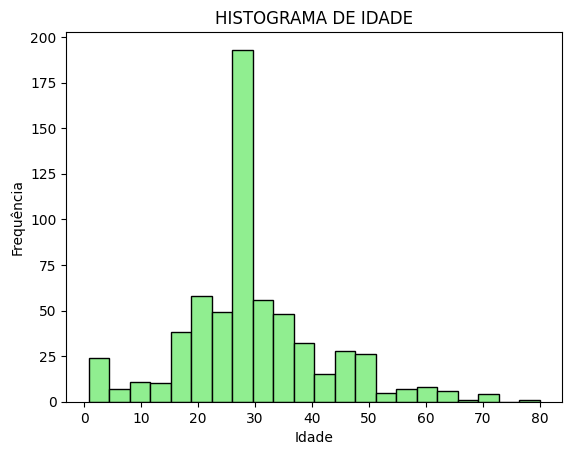

In [8]:
plt.hist(dftrain['age'], bins=22, color='lightgreen', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('HISTOGRAMA DE IDADE')
plt.show()

In [32]:
media_idade = dftrain['age'].mean()
print("Média de idade dos passageiros:", media_idade)

Média de idade dos passageiros: 29.631307814992027


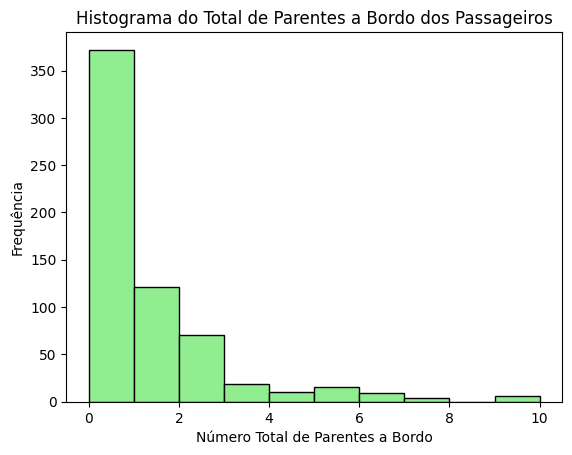

In [25]:
dftrain['Total_Parentes'] = dftrain['n_siblings_spouses'] + dftrain['parch']

plt.hist(dftrain['Total_Parentes'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Número Total de Parentes a Bordo')
plt.ylabel('Frequência')
plt.title('Histograma do Total de Parentes a Bordo dos Passageiros')
plt.show()



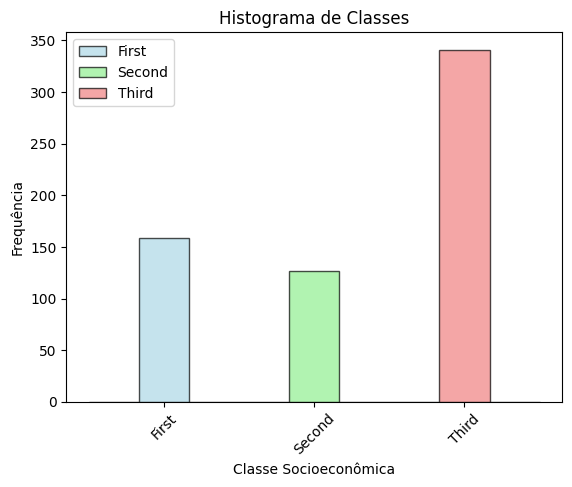

In [30]:
colors = {'First': 'lightblue', 'Second': 'lightgreen', 'Third': 'lightcoral'}

for classe, cor in colors.items():
    dados_classe = dftrain[dftrain['class'] == classe]
    plt.hist(dados_classe['class'], bins=3, color=cor, edgecolor='black', label=classe, alpha=0.7)

plt.xlabel('Classe Socioeconômica')
plt.ylabel('Frequência')
plt.title('Histograma de Classes')
plt.xticks(rotation=45)
plt.legend()
plt.show()

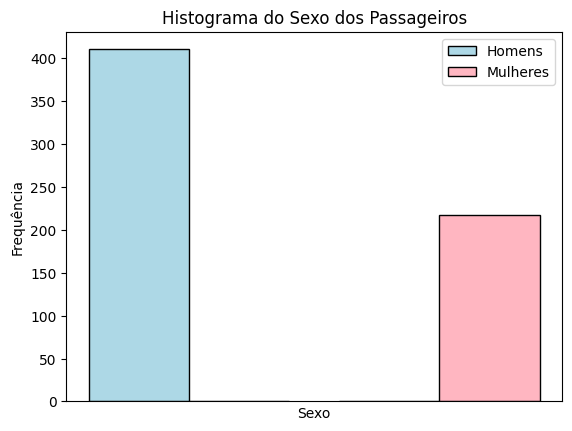

In [28]:
homens = dftrain[dftrain['sex'] == 'male']
mulheres = dftrain[dftrain['sex'] == 'female']

plt.hist([homens['sex'], mulheres['sex']], bins=2, color=['lightblue', 'lightpink'], edgecolor='black', label=['Homens', 'Mulheres'])
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.title('Histograma do Sexo dos Passageiros')
plt.xticks(rotation=45)
plt.legend()
plt.show()

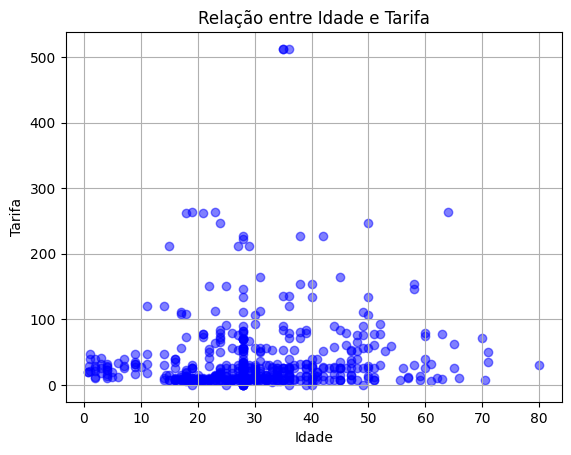

In [4]:
plt.scatter(dftrain['age'], dftrain['fare'], color='blue', alpha=0.5)
plt.title('Relação entre Idade e Tarifa')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.grid(True)
plt.show()

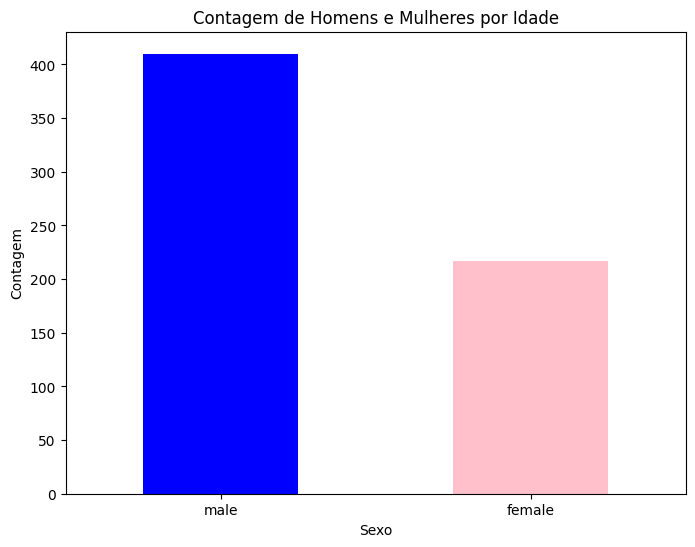

In [9]:
contagem_sexo = dftrain['sex'].value_counts()

plt.figure(figsize=(8, 6))
contagem_sexo.plot(kind='bar', color=['blue', 'pink'])
plt.title('Contagem de passageiros por sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

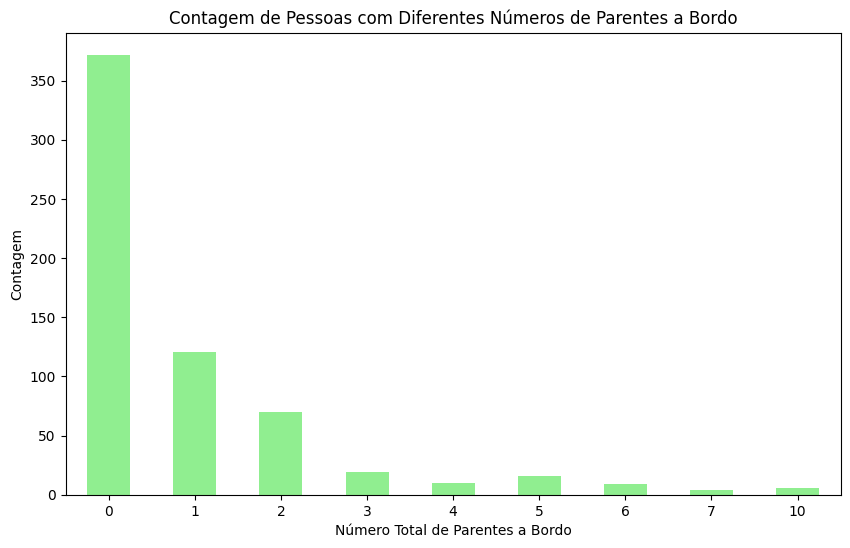

In [10]:
dftrain['Total_Parentes'] = dftrain['n_siblings_spouses'] + dftrain['parch']

contagem_parentes = dftrain['Total_Parentes'].value_counts()

plt.figure(figsize=(10, 6))
contagem_parentes.sort_index().plot(kind='bar', color='lightgreen')
plt.title('Contagem de Pessoas com Diferentes Números de Parentes a Bordo')
plt.xlabel('Número Total de Parentes a Bordo')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

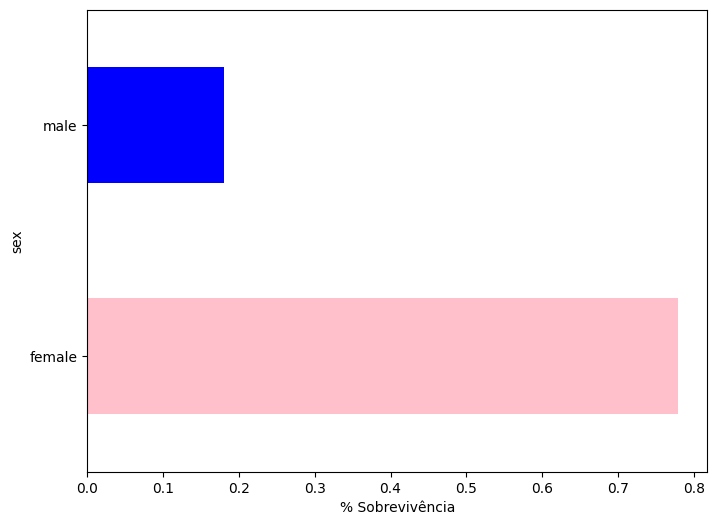

In [14]:
media_sobrevivencia_por_sexo = pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean()

plt.figure(figsize=(8, 6))
media_sobrevivencia_por_sexo.plot(kind='barh', color=['pink', 'blue'])
plt.xlabel('% Sobrevivência')
plt.show()

Text(0.5, 0, '% survive')

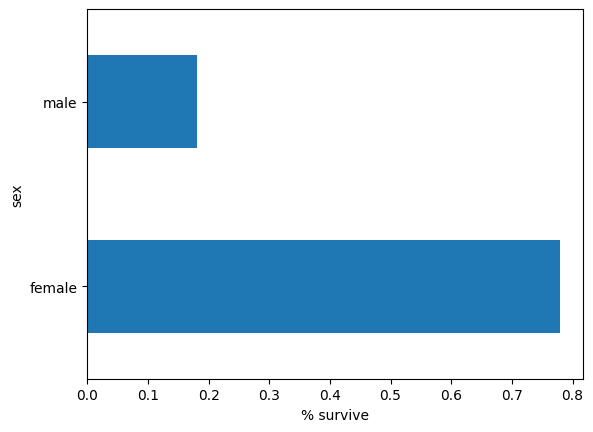

In [41]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

Text(0.5, 0, '% Sobrevivência por classe')

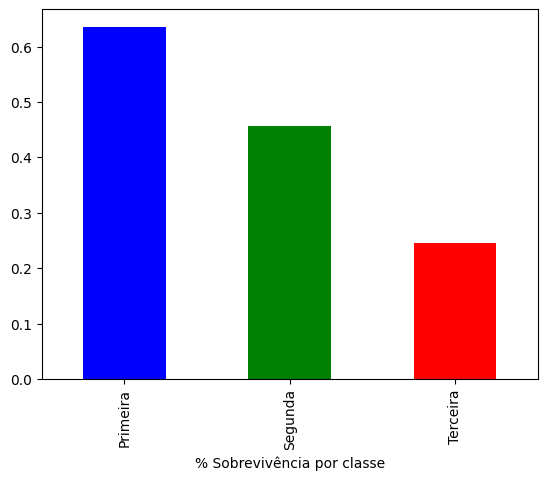

In [23]:
dftrain['class'] = dftrain['class'].replace({'First': 'Primeira', 'Second': 'Segunda', 'Third': 'Terceira'})
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='bar', color=['blue', 'green', 'red']).set_xlabel('% Sobrevivência por classe')


Text(0.5, 0, '% Sobrevivência com ou sem acompanhante')

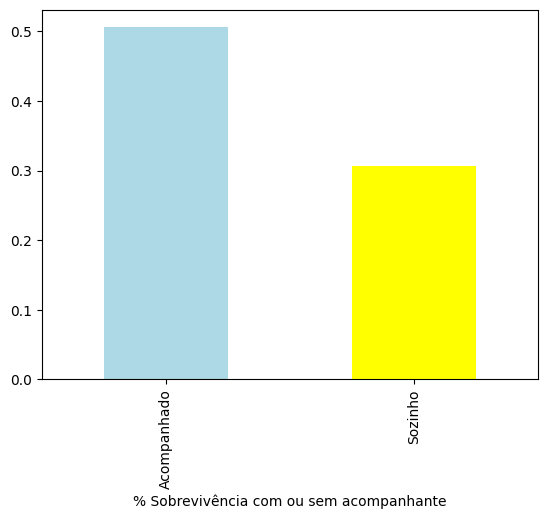

In [24]:
dftrain['alone'] = dftrain['alone'].replace({'n': 'Acompanhado', 'y': 'Sozinho'})
pd.concat([dftrain, y_train], axis=1).groupby('alone').survived.mean().plot(kind='bar', color=['lightblue', 'yellow']).set_xlabel('% Sobrevivência com ou sem acompanhante')


/var/folders/9r/7yls0v3x7dn8j9zhfncqkj800000gp/T/ipykernel_36627/323454535.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.concat([dftrain, y_train], axis=1).groupby('age_group').survived.mean().plot(kind='line', marker='o', color='brown').set_xlabel('% Sobrevivência por faixa etária')


Text(0.5, 0, '% Sobrevivência por faixa etária')

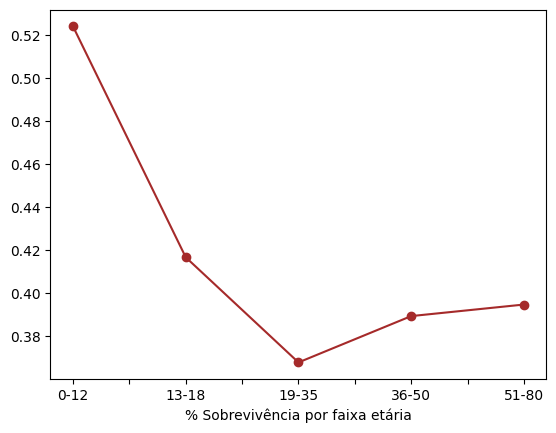

In [29]:
dftrain['age_group'] = pd.cut(dftrain['age'], bins=[0, 12, 18, 35, 50, 80], labels=['0-12', '13-18', '19-35', '36-50', '51-80'])
pd.concat([dftrain, y_train], axis=1).groupby('age_group').survived.mean().plot(kind='line', marker='o', color='brown').set_xlabel('% Sobrevivência por faixa etária')


# <span style="color:lightblue">PREPARANDO OS DADOS PARA CRIAÇÃO DO MODELO DE TREINAMENTO

In [39]:
COLUNAS_CATEGORICAS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone'] 
COLUNAS_NUMERICAS = ['age', 'fare'] 

colunas_de_caracteristicas = [] 

for nome_da_coluna in COLUNAS_CATEGORICAS:
    vocabulario = dftrain[nome_da_coluna].unique()
    colunas_de_caracteristicas.append(tf.feature_column.categorical_column_with_vocabulary_list(nome_da_coluna, vocabulario))


for nome_da_coluna in COLUNAS_NUMERICAS:
    colunas_de_caracteristicas.append(tf.feature_column.numeric_column(nome_da_coluna, dtype=tf.float32))

print(colunas_de_caracteristicas)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Terceira', 'Primeira', 'Segunda'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('Acompanhado', 'Sozinho'

## <span style="color:lightblue"> CRIANDO UM MODELO DE CLASSIFICAÇÃO LINEAR

In [37]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(10000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, Y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=colunas_de_caracteristicas)

linear_est.train(train_input_fn) 
result = linear_est.evaluate(eval_input_fn) 

clear_output() 
print(result['accuracy']) 


0.7348485
